# 数据读取及基础校验

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys

In [2]:
#1.0 数据导入操作：读取保单、赔款数据集
df_pol = pd.read_csv('Data/policy_sample.csv',index_col=False)
df_clm = pd.read_csv('Data/claim_sample.csv',index_col=False)

In [3]:
df_pol.head()

,Unnamed: 0,pol_no,usage_type,coverage,ncd_reason,pol_year,region,gender,insured_age,veh_age_c,...,veh_brand,veh_class,veh_series,veh_price,veh_seat,wr_year,nodc_ind,premium_ori,premium_new,renew_year
0,0,2011OC00001,private,PD,0_F,2011,region_3,F,26.0,VAGEC<0.9,...,TVV6,越野车,TVV6UX,247800,5,1,Y,5640.0324,5543.598552,0
1,1,2011OC00002,private,PD,0_E,2011,region_3,M,39.0,VAGEC<1.9,...,MIV6,越野车,MIV6UZ,538000,5,1,Y,9654.3144,10738.602922,0
2,2,2011OA00003,private,PD,1,2011,region_1,M,39.0,VAGEC<4.9,...,MLU6,轿车类,MLU6UW,312000,5,1,Y,6597.7800,7777.834560,2
3,3,2011ON00004,private,PD,0_F,2011,region_14,M,35.0,VAGEC<0.9,...,VNU6,轿车类,VNU6UY,938000,5,1,Y,19882.4880,19692.205320,0
4,4,2011OA00005,private,PD,0_D,2011,region_1,M,45.0,VAGEC<4.9,...,VHU7,轿车类,VHU7UW,180700,5,1,Y,3321.3288,2859.032526,3


In [4]:
df_clm.head()

,Unnamed: 0,clmno,pol_year,region,pol_no,usage_type,coverage,ultloss,acc_year
0,0,CLM2011100000008,2011,region_1,2011OA00003,private,PD,2326.435493,2011
1,1,CLM2011200000006,2011,region_1,2011OA00009,private,PD,1300.631023,2011
2,2,CLM2011100000028,2011,region_1,2011OA00012,private,PD,2501.326951,2011
3,3,CLM2011100000110,2011,region_1,2011OA00056,private,PD,4573.544265,2011
4,4,CLM2011100000127,2011,region_1,2011OA00069,private,PD,6128.496465,2011


In [5]:
df_pol.shape,df_clm.shape

((50000, 22), (29221, 9))

In [6]:
#1.1 发现导入的数据中，第一列是原有数据的序号列，没有任何意义，这时可以通过以下方式删除这一列。
df_pol.drop('Unnamed: 0',axis=1,inplace=True)
df_clm.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df_pol.head()

,pol_no,usage_type,coverage,ncd_reason,pol_year,region,gender,insured_age,veh_age_c,veh_code,...,veh_brand,veh_class,veh_series,veh_price,veh_seat,wr_year,nodc_ind,premium_ori,premium_new,renew_year
0,2011OC00001,private,PD,0_F,2011,region_3,F,26.0,VAGEC<0.9,VTVZTNCX6669,...,TVV6,越野车,TVV6UX,247800,5,1,Y,5640.0324,5543.598552,0
1,2011OC00002,private,PD,0_E,2011,region_3,M,39.0,VAGEC<1.9,VMIUMCCW6668,...,MIV6,越野车,MIV6UZ,538000,5,1,Y,9654.3144,10738.602922,0
2,2011OA00003,private,PD,1,2011,region_1,M,39.0,VAGEC<4.9,VMLVYBCW6660,...,MLU6,轿车类,MLU6UW,312000,5,1,Y,6597.7800,7777.834560,2
3,2011ON00004,private,PD,0_F,2011,region_14,M,35.0,VAGEC<0.9,VVNVRGCX6698,...,VNU6,轿车类,VNU6UY,938000,5,1,Y,19882.4880,19692.205320,0
4,2011OA00005,private,PD,0_D,2011,region_1,M,45.0,VAGEC<4.9,VXZLEBCV6669,...,VHU7,轿车类,VHU7UW,180700,5,1,Y,3321.3288,2859.032526,3


In [8]:
#1.2 检查两个数据集中的变量及其类型

In [9]:
df_pol.dtypes

pol_no          object
usage_type      object
coverage        object
ncd_reason      object
pol_year         int64
region          object
gender          object
insured_age    float64
veh_age_c       object
veh_code        object
import_ind      object
veh_brand       object
veh_class       object
veh_series      object
veh_price        int64
veh_seat         int64
wr_year          int64
nodc_ind        object
premium_ori    float64
premium_new    float64
renew_year       int64
dtype: object

In [10]:
df_clm.dtypes

clmno          object
pol_year        int64
region         object
pol_no         object
usage_type     object
coverage       object
ultloss       float64
acc_year        int64
dtype: object

#2.0 数据基础校验

In [11]:
#2.1 检验保单库中的保单号是否有重复，并且输出重复项
print ("There are %s records in policy dataset with duplicated policy no"%df_pol.duplicated('pol_no').sum())

There are 0 records in policy dataset with duplicated policy no


In [12]:
#2.2 检查保单号是否一样长
pol_length = df_pol.pol_no.map(lambda x: len(np.str(x)))
print ("保单号的长度为%s"%pol_length.unique())

保单号的长度为[11]


In [13]:
#2.3 检查赔案号是否有重复
print ("There are %s records in claim dataset with duplicated claim no"%df_clm.duplicated('clmno').sum())

There are 0 records in claim dataset with duplicated claim no


In [14]:
#2.4 提取具有相同保单号的赔案
print ("There are %s records in claim dataset"%df_clm.shape[0])
print ("There are %s records in claim dataset with duplicated policy no"%df_clm.duplicated('pol_no').sum())
print ("After removing all the duplicated claims, there are %s left"%df_clm.drop_duplicates('pol_no').shape[0])

There are 29221 records in claim dataset
There are 7709 records in claim dataset with duplicated policy no
After removing all the duplicated claims, there are 21512 left


In [15]:
#2.5 检验保单库和赔案库里的保单信息是否一致
df_pol_clm = pd.merge(df_pol,df_clm,on=['pol_no'],how='left')
print ("The number of records in the combined data is %s"%df_pol_clm.shape[0])
print ("The number of records with different EFFY is %s"%df_pol_clm.loc[df_pol_clm[(df_pol_clm.clmno.isnull()==False)&(df_pol_clm.pol_year_x!=df_pol_clm.pol_year_y)].index].shape[0])
print ("The number of records with different REGION is %s"%df_pol_clm.loc[df_pol_clm[(df_pol_clm.clmno.isnull()==False)&(df_pol_clm.region_x!=df_pol_clm.region_y)].index].shape[0])
print ("The number of records with different VEC13 is %s"%df_pol_clm.loc[df_pol_clm[(df_pol_clm.clmno.isnull()==False)&(df_pol_clm.usage_type_x!=df_pol_clm.usage_type_y)].index].shape[0])
print ("The number of records with different LOB is %s"%df_pol_clm.loc[df_pol_clm[(df_pol_clm.clmno.isnull()==False)&(df_pol_clm.coverage_x!=df_pol_clm.coverage_y)].index].shape[0])
print ("保单库同理赔库中的保单基本信息保持一致。")

The number of records in the combined data is 57709
The number of records with different EFFY is 0
The number of records with different REGION is 0
The number of records with different VEC13 is 0
The number of records with different LOB is 0
保单库同理赔库中的保单基本信息保持一致。


In [16]:
df_pol_clm.head()

,pol_no,usage_type_x,coverage_x,ncd_reason,pol_year_x,region_x,gender,insured_age,veh_age_c,veh_code,...,premium_ori,premium_new,renew_year,clmno,pol_year_y,region_y,usage_type_y,coverage_y,ultloss,acc_year
0,2011OC00001,private,PD,0_F,2011,region_3,F,26.0,VAGEC<0.9,VTVZTNCX6669,...,5640.0324,5543.598552,0,CLM2011100000002,2011.0,region_3,private,PD,4509.826774,2011.0
1,2011OC00002,private,PD,0_E,2011,region_3,M,39.0,VAGEC<1.9,VMIUMCCW6668,...,9654.3144,10738.602922,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011OA00003,private,PD,1,2011,region_1,M,39.0,VAGEC<4.9,VMLVYBCW6660,...,6597.7800,7777.834560,2,CLM2011100000008,2011.0,region_1,private,PD,2326.435493,2011.0
3,2011ON00004,private,PD,0_F,2011,region_14,M,35.0,VAGEC<0.9,VVNVRGCX6698,...,19882.4880,19692.205320,0,CLM2012100000009,2011.0,region_14,private,PD,20891.460269,2012.0
4,2011OA00005,private,PD,0_D,2011,region_1,M,45.0,VAGEC<4.9,VXZLEBCV6669,...,3321.3288,2859.032526,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_clm.head()

,clmno,pol_year,region,pol_no,usage_type,coverage,ultloss,acc_year
0,CLM2011100000008,2011,region_1,2011OA00003,private,PD,2326.435493,2011
1,CLM2011200000006,2011,region_1,2011OA00009,private,PD,1300.631023,2011
2,CLM2011100000028,2011,region_1,2011OA00012,private,PD,2501.326951,2011
3,CLM2011100000110,2011,region_1,2011OA00056,private,PD,4573.544265,2011
4,CLM2011100000127,2011,region_1,2011OA00069,private,PD,6128.496465,2011


In [18]:
#2.6 检验是否赔款都大于0
print ("The number of records with claim amount <=0 is %s"%df_clm[df_clm.ultloss<=0].shape[0])
df_clm[df_clm.ultloss<=0]

The number of records with claim amount <=0 is 0


,clmno,pol_year,region,pol_no,usage_type,coverage,ultloss,acc_year


{'whiskers': [<matplotlib.lines.Line2D at 0x1a28b4d1a58>,
 'caps': [<matplotlib.lines.Line2D at 0x1a28b4e1358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a28b4d1908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a28b4e1ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a28b4e1fd0>],
 'means': []}

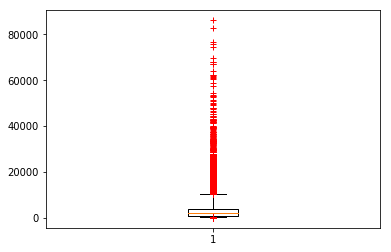

In [19]:
plt.boxplot(df_clm.ultloss,sym='r+',whis=[5,95],meanline=True)

([<matplotlib.axis.XTick at 0x1a28c7c4c18>,
 <a list of 8 Text xticklabel objects>)

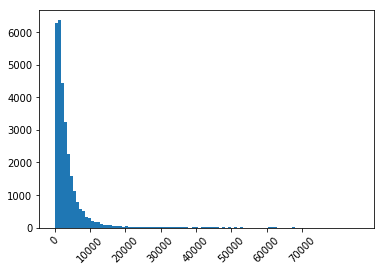

In [20]:
plt.hist(df_clm.ultloss,bins=100)
plt.xticks([0,10000,20000,30000,40000,50000,60000,70000],rotation=45)

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 7.000e+00,
        5.000e+00, 3.000e+00, 6.000e+00, 9.000e+00, 1.100e+01, 6.000e+00,
        1.400e+01, 1.100e+01, 7.000e+00, 1.300e+01, 1.900e+01, 2.200e+01,
        3.900e+01, 2.800e+01, 3.700e+01, 3.600e+01, 5.800e+01, 5.400e+01,
        7.600e+01, 7.400e+01, 8.500e+01, 8.300e+01, 1.160e+02, 1.250e+02,
        1.420e+02, 1.520e+02, 1.650e+02, 2.310e+02, 2.220e+02, 2.760e+02,
        3.090e+02, 3.540e+02, 3.990e+02, 4.550e+02, 4.860e+02, 5.970e+02,
        6.790e+02, 6.840e+02, 7.900e+02, 8.050e+02, 9.440e+02, 9.670e+02,
        1.018e+03, 1.124e+03, 1.097e+03, 1.121e+03, 1.151e+03, 1.174e+03,
        1.215e+03, 1.237e+03, 1.118e+03, 1.145e+03, 1.078e+03, 9.640e+02,
        8.970e+02, 8.130e+02, 7.340e+02, 5.880e+02, 5.120e+02, 4.880e+02,
        3.750e+02, 3.530e+02, 2.630e+0

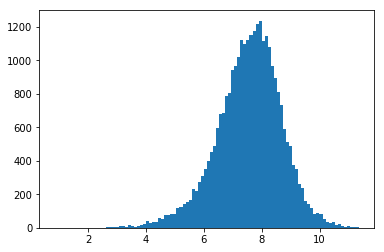

In [21]:
plt.hist(np.log1p(df_clm.ultloss),bins=100)
#plt.xticks([0,10000,20000,30000,40000,50000,60000,70000],rotation=45)

In [22]:
#2.7 检验是否赔款都不大于新车购置价
print ("The number of records with claim amount greater than sum insured is %s"%df_pol_clm[df_pol_clm.ultloss > df_pol_clm.veh_price].shape[0])
df_pol_clm[df_pol_clm.ultloss > df_pol_clm.veh_price]

The number of records with claim amount greater than sum insured is 0


,pol_no,usage_type_x,coverage_x,ncd_reason,pol_year_x,region_x,gender,insured_age,veh_age_c,veh_code,...,premium_ori,premium_new,renew_year,clmno,pol_year_y,region_y,usage_type_y,coverage_y,ultloss,acc_year


In [23]:
#2.8 检验起保年度和出险年度是否有异常值
print ("The number of records of policy data not in year 2011/2012/2013/2014 is %s"%df_pol.pol_year.map(lambda x: 1 if x not in [2011,2012,2013,2014] else 0).sum())
print ("The number of records of claim data not in year 2011/2012/2013/2014 is %s"%df_clm.pol_year.map(lambda x: 1 if x not in [2011,2012,2013,2014] else 0).sum())

The number of records of policy data not in year 2011/2012/2013/2014 is 0
The number of records of claim data not in year 2011/2012/2013/2014 is 0


([<matplotlib.axis.XTick at 0x1a28ccd7a20>,
 <a list of 4 Text xticklabel objects>)

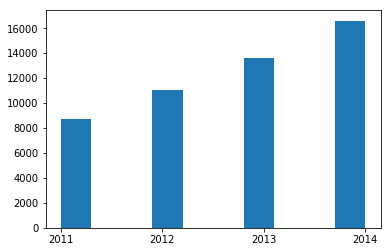

In [24]:
plt.hist(df_pol.pol_year)
plt.xticks([2011,2012,2013,2014])

In [25]:
#2.9 检验是否存在起保年度晚于出险年度的异常情况
print ("The number of records of pol_year later than acc_year is %s"%df_clm[df_clm.pol_year > df_clm.acc_year].shape[0])

The number of records of pol_year later than acc_year is 0


In [26]:
#2.10 检验车主年龄是否存在小于18或者大于70的情况
df_pol[(df_pol.insured_age < 18)|(df_pol.insured_age > 70)].shape[0]

41

In [27]:
#2.11 检验车主性别是否有异常值（非“男”和“女”）
df_pol.gender.value_counts()

M    36023
F    13714
Name: gender, dtype: int64

#3.0 数据口径校验

In [28]:
#3.1 根据保单年统计保单数、总保费、平均保费
df_pol_grp_year = df_pol.groupby('pol_year',as_index=False)
df_pol_grp_year.agg({'pol_no':'count','premium_ori':['sum','mean'],'premium_new':['sum','mean']})

pol_year pol_no   premium_ori                premium_new             
            count           sum         mean           sum         mean
0     2011   8752  2.730113e+07  3119.416646  2.804120e+07  3203.975731
1     2012  11022  3.466118e+07  3144.727339  3.574661e+07  3243.205533
2     2013  13625  4.316687e+07  3168.210573  4.458316e+07  3272.158530
3     2014  16601  5.204803e+07  3135.234711  5.348702e+07  3221.915643

In [29]:
#3.2 根据事故年统计赔案件数、赔案总金额
df_clm_grp_year = df_clm.groupby('acc_year',as_index=False)
df_clm_grp_year.agg({'clmno':'count','ultloss':['sum','mean']})

acc_year clmno       ultloss             
           count           sum         mean
0     2011  2649  7.726938e+06  2916.926370
1     2012  6230  1.964686e+07  3153.588304
2     2013  7458  2.532234e+07  3395.325835
3     2014  8243  2.935200e+07  3560.840037
4     2015  4641  1.612802e+07  3475.117915

#4.0 数据分布校验

In [30]:
#4.1 年龄离散化
w = [0,18,20,25,30,35,40,45,50,55,60,75,100,200]
df_pol.loc[:,'AgeC'] = pd.cut(df_pol.insured_age,w,right=False)
df_pol.AgeC.value_counts(dropna=False).sort_index()

NaN            272
[0, 18)          6
[18, 20)       114
[20, 25)      2805
[25, 30)      7569
[30, 35)      9471
[35, 40)      9258
[40, 45)      8909
[45, 50)      6195
[50, 55)      3058
[55, 60)      1569
[60, 75)       759
[75, 100)       15
[100, 200)       0
Name: AgeC, dtype: int64

In [31]:
#4.2 座位离散化
w = [0,6,11]
df_pol.loc[:,'SeatC'] = pd.cut(df_pol.veh_seat,w,right=False)
df_pol.SeatC.value_counts(dropna=False)

[0, 6)     45379
[6, 11)     4597
NaN           24
Name: SeatC, dtype: int64

In [32]:
#4.2 车价离散化
w = [0,100000,150000,200000,250000,300000,400000,500000,1000000,1500000,2000000]
df_pol.loc[:,'PRC'] = pd.cut(df_pol.veh_price,w,right=False)
df_pol.PRC.value_counts(dropna=False).sort_index()

[0, 100000)           24474
[100000, 150000)      11015
[150000, 200000)       6378
[200000, 250000)       3299
[250000, 300000)       1501
[300000, 400000)       1501
[400000, 500000)        821
[500000, 1000000)       915
[1000000, 1500000)       96
[1500000, 2000000)        0
Name: PRC, dtype: int64

In [33]:
df_pol_clm['ultloss'].describe(percentiles=[0,0.25,0.5,0.75,0.9,0.95,0.99])
#课堂问题：为何这里的loss最小值不是1？因为没有loss的合并后都是NaN

count    29221.000000
mean      3359.780974
std       4544.003599
min          1.339633
0%           1.339633
25%        984.962986
50%       2072.599275
75%       4021.069169
90%       7188.927512
95%      10315.451906
99%      22559.116169
max      86154.307121
Name: ultloss, dtype: float64

In [34]:
df_pol_clm[df_pol_clm.ultloss.isnull()==True].shape

(28488, 28)

In [35]:
28488+29221
#和该数据集整体记录条数一致。

57709

In [36]:
#Change all NaN to zero
df_pol_clm.loc[df_pol_clm[df_pol_clm.ultloss.isnull()==True].index,'ultloss'] = 0

In [37]:
df_pol_clm[df_pol_clm.ultloss==0].shape

(28488, 28)

([<matplotlib.axis.XTick at 0x1a28cd38fd0>,
 <a list of 8 Text xticklabel objects>)

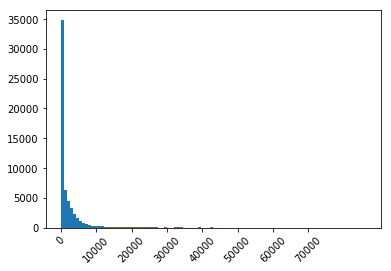

In [38]:
plt.hist(df_pol_clm.ultloss,bins=100)
plt.xticks([0,10000,20000,30000,40000,50000,60000,70000],rotation=45)

(0, 5000)

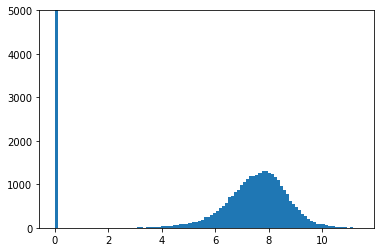

In [39]:
plt.hist(np.log1p(df_pol_clm.ultloss),bins=100)
plt.ylim(0,5000)

In [40]:
def year_split(yrs,eff_acc_year,loss):
    loss_return = np.zeros(len(loss))
    #print (len(loss))
    for i in range(len(eff_acc_year)):
        if eff_acc_year[i] == yrs :
            loss_return[i] = loss[i]
        else:
            loss_return[i] = np.nan
    #print (len(loss_return))
    return loss_return

df_pol_clm['2011_eff_ULTLS'] = year_split(2011,df_pol_clm.pol_year_x.values,df_pol_clm.ultloss.values)
df_pol_clm['2011_acc_ULTLS'] = year_split(2011,df_pol_clm.acc_year.values,df_pol_clm.ultloss.values)

df_pol_clm['2012_eff_ULTLS'] = year_split(2012,df_pol_clm.pol_year_x.values,df_pol_clm.ultloss.values)
df_pol_clm['2012_acc_ULTLS'] = year_split(2012,df_pol_clm.acc_year.values,df_pol_clm.ultloss.values)

df_pol_clm['2013_eff_ULTLS'] = year_split(2013,df_pol_clm.pol_year_x.values,df_pol_clm.ultloss.values)
df_pol_clm['2013_acc_ULTLS'] = year_split(2013,df_pol_clm.acc_year.values,df_pol_clm.ultloss.values)

df_pol_clm['2014_eff_ULTLS'] = year_split(2014,df_pol_clm.pol_year_x.values,df_pol_clm.ultloss.values)
df_pol_clm['2014_acc_ULTLS'] = year_split(2014,df_pol_clm.acc_year.values,df_pol_clm.ultloss.values)

df_pol_clm['2015_eff_ULTLS'] = year_split(2015,df_pol_clm.pol_year_x.values,df_pol_clm.ultloss.values)
df_pol_clm['2015_acc_ULTLS'] = year_split(2015,df_pol_clm.acc_year.values,df_pol_clm.ultloss.values)

In [41]:
df_pol_clm[['2011_eff_ULTLS','2012_eff_ULTLS','2013_eff_ULTLS','2014_eff_ULTLS']].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,2011_eff_ULTLS,2012_eff_ULTLS,2013_eff_ULTLS,2014_eff_ULTLS
count,10353.000000,13013.000000,15737.000000,18606.000000
mean,1613.969573,1763.453740,1811.707307,1612.816911
std,3313.944580,3573.915949,4072.739819,3475.968676
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,340.631367,380.214305,156.602139,0.000000
75%,2029.172723,2229.436417,2193.990326,1992.234783
90%,4412.655258,4852.381704,4889.107418,4733.639458
max,76813.029597,75689.844313,86154.307121,82727.178732


In [42]:
df_pol_clm[['2011_acc_ULTLS','2012_acc_ULTLS','2013_acc_ULTLS','2014_acc_ULTLS','2015_acc_ULTLS']].describe()

,2011_acc_ULTLS,2012_acc_ULTLS,2013_acc_ULTLS,2014_acc_ULTLS,2015_acc_ULTLS
count,2649.000000,6230.000000,7458.000000,8243.000000,4641.000000
mean,2916.926370,3153.588304,3395.325835,3560.840037,3475.117915
std,3607.536376,4360.348411,4787.304907,4927.383454,4106.427625
min,11.678712,13.758896,4.282960,1.339633,4.590730
25%,855.039903,930.020455,983.942968,1027.795235,1112.377777
50%,1779.703958,1937.669754,2090.627534,2174.175616,2247.135807
75%,3579.220386,3726.388651,4009.599461,4258.886215,4277.518543
max,47880.782665,76813.029597,75689.844313,86154.307121,57379.784827
